In [1]:
import configs as c

from timeit import default_timer as timer

from datetime import timedelta
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy.stats as st

# Results

In [4]:
from model import microsim, counterfactual
import transition_matrix as tm
import model_functions as mf
from tqdm import tqdm

# 1M

In [2]:
cases = pd.read_csv('1M/sj120/cases.csv')
states_total = pd.read_csv('1M/sj120/states_total_1M.csv')

In [5]:
dt1, dt2, dt3, dt4, pcmort = mf.get_incidence(np.array(states_total), cases['dt1'], cases['dt2'], cases['dt3'], cases['dt4'], cases['pcmort'])

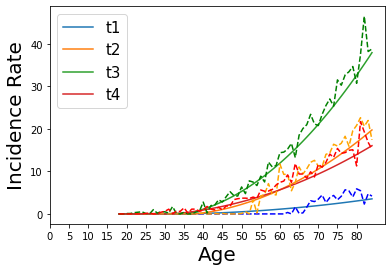

In [6]:
c.target_inc.index = list(c.age_range)
c.target_inc.plot()

plt.plot(list(c.age_range), dt1,'b--')
plt.plot(list(c.age_range), dt2, color = 'orange', linestyle= '--')
plt.plot(list(c.age_range), dt3, 'g--')
plt.plot(list(c.age_range), dt4, 'r--')
plt.legend(['t1', 't2', 't3', 't4'], fontsize=15)
plt.xticks(list(range(0,85,5)))
plt.ylabel('Incidence Rate', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.show()

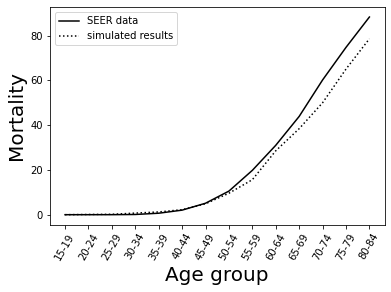

In [7]:
plt.plot(c.age_group, c.target_pcmort.values, 'k')
plt.plot(c.age_group, mf.grouping(pcmort), 'k:')
plt.xticks(rotation = 60)
plt.ylabel('Mortality', fontsize = 20)
plt.xlabel('Age group', fontsize = 20)
plt.legend(['SEER data', 'simulated results'])
plt.show()

In [8]:
res36_after = {}
for it in tqdm(range(10)):
    res36_after[it] = pd.read_pickle(r'1M/sj36/res1M_after'+str(it)+'.pickle')
res36 = {}
res36[0] = {}
res36[0][0] = pd.read_pickle(r'1M/sj36/res1M_before0.pickle')
res36[1] = res36_after

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:23<00:00, 26.37s/it]


In [9]:
res60_after = {}
for it in tqdm(range(10)):
    res60_after[it] = pd.read_pickle(r'1M/sj60/res1M_after'+str(it)+'.pickle')
res60 = {}
res60[0] = {}
res60[0][0] = pd.read_pickle(r'1M/sj60/res1M_before0.pickle')
res60[1] = res60_after

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [06:21<00:00, 38.12s/it]


In [10]:
test_months = [3, 6, 12, 24, 48, 60, 72, 84, 96, 108, 120]

In [11]:
res120_after = {}
for it in tqdm(range(10)):
    res120_after[it] = {}
    for m in test_months:
        res120_after[it][m] = pd.read_pickle(r'1M/sj120/res1M_after'+str(it)+'_'+ str(m)+'m.pickle')

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [21:02<00:00, 126.29s/it]


In [12]:
res120 = {}
res120[0] = {}
res120[0][0] = {}
for m in tqdm(test_months):
    res120[0][0][m] = pd.read_pickle(r'1M/sj120/res1M_before0'+'_'+ str(m)+'m.pickle')
res120[1] = res120_after

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [02:00<00:00, 10.96s/it]


In [13]:
cohort36 = pd.read_pickle(r'1M/sj36/cohort1M_cf.pickle')
cohort60 = pd.read_pickle(r'1M/sj60/cohort1M_cf.pickle')
cohort120 = pd.read_pickle(r'1M/sj120/cohort1M_cf.pickle')

In [14]:
print(len(cohort36))
print(len(cohort60))
print(len(cohort120))

9812
10054
10406


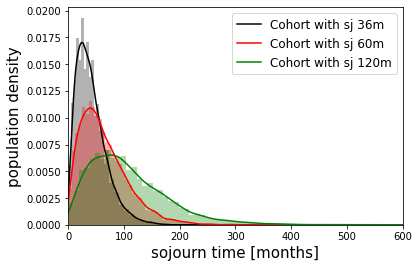

In [15]:
def progression_time(record_all):
    pt = []
    for i in range(len(record_all)):
        u_duration, d_duration = [], []
        h = record_all[i]
        for ii in range(len(h)):
            if h[ii][0] == 'U':
                u_duration.append(ii)
            if h[ii][0] == 'D':
                d_duration.append(ii)
        pt.append(d_duration[0] - u_duration[0])
    return pt

# plt.hist(progression_time(cohort36dm), bins=50, alpha = 0.3, density = True, color = 'm')
# pd.Series(progression_time(cohort36dm)).plot(kind = 'kde', color = 'm')

plt.hist(progression_time(cohort36), bins=50, alpha = 0.3, density = True, color = 'k')
pd.Series(progression_time(cohort36)).plot(kind = 'kde', color = 'k')

plt.hist(progression_time(cohort60), bins=50, alpha = 0.3, density = True, color = 'r')
pd.Series(progression_time(cohort60)).plot(kind = 'kde', color = 'r')

plt.hist(progression_time(cohort120), bins=50, alpha = 0.3, density = True, color = 'g')
pd.Series(progression_time(cohort120)).plot(kind = 'kde', color = 'g')

plt.xlabel('sojourn time [months]', fontsize = 15)
plt.ylabel('population density', fontsize = 15)
plt.legend(['Cohort with sj 36m', 'Cohort with sj 60m', 'Cohort with sj 120m'], fontsize = 12)
plt.xlim([0,600])
plt.show()

In [19]:
print(np.median(progression_time(cohort36)))
print(np.median(progression_time(cohort60)))
print(np.median(progression_time(cohort120)))

36.0
55.0
93.0


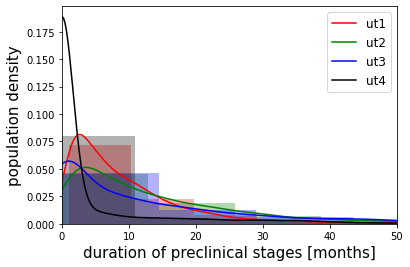

In [20]:
def Uprogression_time(record_all):
    t1, t2, t3, t4 = [], [], [], []
    for i in range(len(record_all)):
        u1d, u2d, u3d, u4d = 0,0,0,0
        h = record_all[i]
        for ii in range(len(h)):
            if h[ii] == 'UT1':
                u1d += 1
            elif h[ii] == 'UT2':
                u2d += 1
            elif h[ii] == 'UT3':
                u3d += 1
            elif h[ii] == 'UT4':
                u4d += 1
        t1.append(u1d)
        t2.append(u2d)
        t3.append(u3d)
        t4.append(u4d)
    return t1, t2, t3, t4

ut1d, ut2d, ut3d, ut4d = Uprogression_time(cohort36)
colors = ['r','g','b','k']
ii=0
for i in [ut1d,ut2d,ut3d,ut4d]:
    plt.hist(i, bins=10, alpha = 0.3, density = True, color = colors[ii])
    pd.Series(i).plot(kind = 'kde', color = colors[ii])
    ii+=1

plt.xlabel('duration of preclinical stages [months]', fontsize = 15)
plt.ylabel('population density', fontsize = 15)
plt.legend(['ut1', 'ut2', 'ut3', 'ut4'], fontsize = 12)
plt.xlim([0,50])
plt.show()

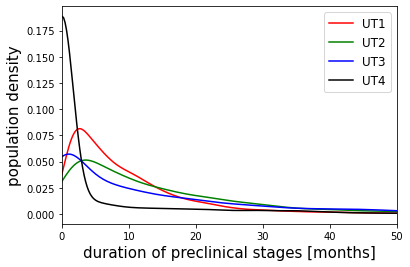

In [21]:
ut1d, ut2d, ut3d, ut4d = Uprogression_time(cohort36)
colors = ['r','g','b','k']
ii=0
for i in [ut1d,ut2d,ut3d,ut4d]:
    # plt.hist(i, bins=10, alpha = 0.3, density = True, color = colors[ii])
    pd.Series(i).plot(kind = 'kde', color = colors[ii])
    ii+=1

plt.xlabel('duration of preclinical stages [months]', fontsize = 15)
plt.ylabel('population density', fontsize = 15)
plt.legend(['UT1', 'UT2', 'UT3', 'UT4'], fontsize = 12)
plt.xlim([0,50])
plt.show()

In [22]:
print(np.median(ut1d))
print(np.median(ut2d))
print(np.median(ut3d))
print(np.median(ut4d))

7.0
10.0
7.0
0.0


In [23]:
testN36, testN60, testN120 = [], [], []
for i in test_months:
    testN36.append(len(res36[1][0][i]))
    testN60.append(len(res60[1][0][i]))
    testN120.append(len(res120[1][0][i]))

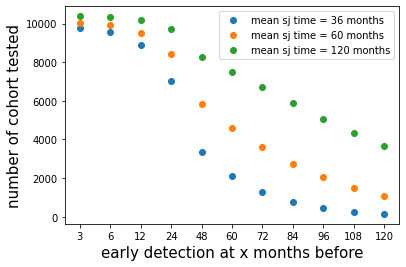

In [24]:
plt.plot(testN36, 'o')
plt.plot(testN60, 'o')
plt.plot(testN120, 'o')
plt.ylabel('number of cohort tested', fontsize = 15)
plt.xlabel('early detection at x months before', fontsize = 15)
plt.xticks(np.array(range(len(test_months))), test_months)
plt.legend(['mean sj time = 36 months', 'mean sj time = 60 months', 'mean sj time = 120 months'])
plt.show()

In [25]:
def cal_survival_lengths(test):
    months_survived, years_survived = [], []
    for h in test:
        d_duration = []
        for i in range(len(h)):
            if h[i][0] == 'D':
                d_duration.append(i)
        # print(mf.ageATtime(d_duration[0]))
        if h[-1] == 'PCMORT':
            diedage = mf.ageATtime(h.index('PCMORT'))
            index = h.index('PCMORT')
            # print('PCMORT at '+ str(mf.ageATtime(index)))
        elif h[-1] == 'ACMORT':
            diedage = mf.ageATtime(h.index('ACMORT'))
            index = h.index('ACMORT')
            # print('ACMORT at '+ str(mf.ageATtime(index)))
        else:
            diedage = 85
            index = len(h)
        years_survived.append(diedage - mf.ageATtime(d_duration[0]))
        # print('years_survived = ' + str(years_survived))
        # print('months_survived = ' + str(index - i))
        months_survived.append(index-d_duration[0])
    
    return months_survived, years_survived

In [26]:
iterN=10
def years_survived(res):
    years_survived_before, years_survived_after = {}, {}
    for i in test_months:
        years_survived_before[i] = []
        years_survived_after[i] = []
    for it in tqdm(range(iterN)):
        cf_before = res[0][0]
        cf_after = res[1][it]
        for i in test_months:
            mb, yb = cal_survival_lengths(cf_before[i])
            ma, ya = cal_survival_lengths(cf_after[i])

            years_survived_before[i].append(np.mean([i/12 for i in mb]))
            years_survived_after[i].append(np.mean([i/12 for i in ma]))
    return years_survived_before, years_survived_after

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:18<00:00, 19.80s/it]


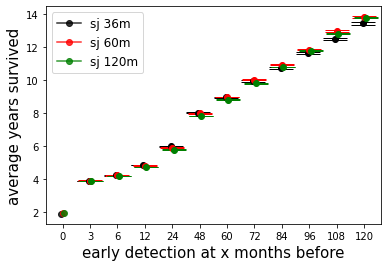

In [59]:
col = ['k', 'r', 'g', 'b']
ii=0
pos = [-5, 0, 5, 0]
for test in [res36, res60, res120]:
    years_survived_before, years_survived_after = years_survived(test)
    avg, ci = [],[]
    for i in test_months:
        avg_value = np.mean(years_survived_after[i])
        ci_up_down = st.t.interval(alpha=0.95, df=len(years_survived_after[i])-1, loc=np.mean(years_survived_after[i]), scale=st.sem(years_survived_after[i]))
        ci_up = ci_up_down[1]-avg_value
        ci_down = avg_value - ci_up_down[0]
        ci.append([ci_down, ci_up])
        avg.append(avg_value)
    y_errormin = [i[0] for i in ci]
    y_errormax = [i[1] for i in ci]
    y_error =[y_errormin, y_errormax]
    plt.errorbar(np.array(np.array(range(len(test_months)))+1)*100+pos[ii], avg, yerr =y_error, fmt ='o', color = col[ii], capsize = 12)
    plt.plot(pos[ii], np.mean(years_survived_before[3]), marker = 'o', color = col[ii], alpha = 0.8)
    ii += 1
plt.xticks([0]+list(np.array(np.array(range(len(test_months)))+1)*100), [0]+test_months)
plt.ylabel('average years survived', fontsize = 15)
plt.xlabel('early detection at x months before', fontsize = 15)
plt.legend(['sj 36m', 'sj 60m', 'sj 120m'], fontsize = 12)
plt.show()  

In [28]:
from scipy.stats import f_oneway
years_survived_before, years_survived_after36 = years_survived(res36)
years_survived_before, years_survived_after60 = years_survived(res60)
years_survived_before, years_survived_after120 = years_survived(res120)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:21<00:00, 20.12s/it]


In [29]:
for i in test_months:
    test = f_oneway(years_survived_after36[i], years_survived_after60[i], years_survived_after120[i])
    print(i)
    print(test)

3
F_onewayResult(statistic=4.078629681039207, pvalue=0.028327493101408453)
6
F_onewayResult(statistic=11.020670008015625, pvalue=0.00031682495537804393)
12
F_onewayResult(statistic=77.42799659855336, pvalue=6.562781898441713e-12)
24
F_onewayResult(statistic=134.1525063675449, pvalue=9.435279258112735e-15)
48
F_onewayResult(statistic=121.59771531315889, pvalue=3.131538915057713e-14)
60
F_onewayResult(statistic=91.92487604047713, pvalue=8.90787343068163e-13)
72
F_onewayResult(statistic=38.74430007058835, pvalue=1.1640738128663511e-08)
84
F_onewayResult(statistic=36.89755460433946, pvalue=1.8922482388581457e-08)
96
F_onewayResult(statistic=33.768162511856765, pvalue=4.4960191740247006e-08)
108
F_onewayResult(statistic=118.90816520088755, pvalue=4.108246681550876e-14)
120
F_onewayResult(statistic=70.51232606551174, pvalue=1.9093047347377868e-11)


In [30]:
i=48
print(np.mean(years_survived_after36[i]))
print(np.mean(years_survived_after60[i]))
print(np.mean(years_survived_after120[i]))

8.043275466427216
8.01623829106694
7.837201986089335


In [33]:
from scipy import stats
print(stats.ttest_ind(years_survived_after36[i], years_survived_after60[i], equal_var = False))

Ttest_indResult(statistic=1.6274660730299004, pvalue=0.12115638508684941)


In [34]:
def months_gained(cf_before, cf_after):
    months_gained1, months_gained2 = [], []
    check=[]
    for i in range(len(cf_before)):
        idx_before = cf_before[i].index('PCMORT')
        diedage_before = mf.ageATtime(idx_before)
        if cf_after[i][-1] == 'PCMORT':
            idx_after = cf_after[i].index('PCMORT')
            diedage_after = mf.ageATtime(idx_after)
        elif cf_after[i][-1] == 'ACMORT':
            idx_after = cf_after[i].index('ACMORT')
            diedage_after = mf.ageATtime(idx_after)
        else:
            diedage = 85
            idx_after = len(cf_after[i])
        if i in leadT_bias:
            months_gained1.append(idx_after - idx_before)
            # if idx_after - idx_before < -120:
            #     check.append(i)
            # if cf_after[i][-1] == 'ACMORT':
            #     check.append(i)
        else:
            months_gained2.append(idx_after - idx_before)
        #     if idx_after - idx_before > 30*12:
        #         check.append(i)
    return np.array(months_gained1 + months_gained2)

In [35]:
def ageATtime(idx):
    return (idx-1)/12+c.age_range[0]

In [36]:
def res_df(res, month):

    pcmortAt, detected_stage, detectedAt, cf_stage, cf_age, diedAt, diedBy, yg = [], [], [], [], [], [], [], []
    stage_before_died = []

    for it in range(10):
        for case in range(len(res[1][it][month])):
            b = res[0][0][month][case]
            a = res[1][it][month][case]

            pcmortAt.append(ageATtime(b.index('PCMORT')))
            dts = b[b.index('PCMORT')-1]
            detected_stage.append(dts)
            detectedAt.append(ageATtime(b.index(dts)))
            cf_stage.append(b[b.index(dts)-month])
            cf_age.append(ageATtime(b.index(dts)-month))

            if a[-1]=='PCMORT':
                da = ageATtime(a.index('PCMORT'))
                stage_before_died.append(a[a.index('PCMORT')-1])
            elif a[-1]=='ACMORT':
                da = ageATtime(a.index('ACMORT'))
                stage_before_died.append(a[a.index('ACMORT')-1])
            else:
                da = 85
                stage_before_died.append(a[-1])

            diedAt.append(da)
            diedBy.append(a[-1])
            yg.append(da-ageATtime(b.index('PCMORT')))

        res_df = pd.DataFrame()
        res_df['pcmortAt'] = pcmortAt
        res_df['detected_stage'] = detected_stage
        res_df['detectedAt'] = detectedAt
        res_df['cf_stage'] = cf_stage
        res_df['cf_age'] = cf_age
        res_df['diedAt'] = diedAt
        res_df['diedBy'] = diedBy
        res_df['stage_before_died'] = stage_before_died
        res_df['years_gained'] = yg
    return res_df

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:12<00:00, 84.07s/it]


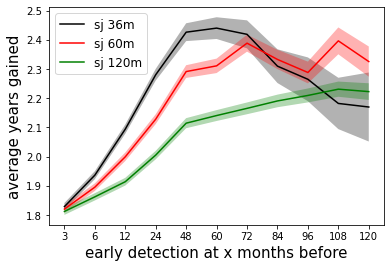

In [60]:
ii=0
fig, ax = plt.subplots()
for test in tqdm([res36, res60, res120]):
    avg, ci = [],[]
    for m in test_months:
        y = res_df(test, m)['years_gained'].tolist()
        avg_value = np.mean(y)
        ci_up_down = st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y), scale=st.sem(y))
        ci_up = ci_up_down[1]-avg_value
        ci_down = avg_value - ci_up_down[0]
        ci.append([ci_down, ci_up])
        avg.append(avg_value)
    y_errormin = [i[0] for i in ci]
    y_errormax = [i[1] for i in ci]
    y_error =[y_errormin, y_errormax]
    ax.plot(np.array(range(len(test_months)))+1, avg, color = col[ii])
    ax.fill_between(np.array(range(len(test_months)))+1, np.array(avg)-np.array(y_errormin), np.array(avg)+np.array(y_errormax), alpha=0.3, facecolor = col[ii])
    ii += 1
plt.xticks(np.array(range(len(test_months)))+1, test_months)
plt.ylabel('average years gained', fontsize = 15)
plt.xlabel('early detection at x months before', fontsize = 15)
# plt.legend(['sj 36m', 'sj 60m', 'sj 120m', 'sj 1800m'], fontsize = 12)
plt.legend(['sj 36m', 'sj 60m', 'sj 120m'], fontsize = 12)

plt.show()

In [38]:
y36, y60, y120={}, {}, {}
for m in tqdm(test_months):
    y36[m] = res_df(res36, m)['years_gained'].tolist()
    y60[m] = res_df(res60, m)['years_gained'].tolist()
    y120[m] = res_df(res120, m)['years_gained'].tolist()

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [04:12<00:00, 22.92s/it]


In [39]:
from scipy import stats

In [40]:
def sig_change(y):
    for i in range(len(test_months)-1):
        print(str(test_months[i])+' vs '+str(test_months[i+1]))
        print(stats.ttest_ind(y[test_months[i]], y[test_months[i+1]], equal_var = False))

In [42]:
sig_change(y120)

3 vs 6
Ttest_indResult(statistic=-5.695816142163988, pvalue=1.229492117266687e-08)
6 vs 12
Ttest_indResult(statistic=-5.587016639718908, pvalue=2.3129671911207168e-08)
12 vs 24
Ttest_indResult(statistic=-9.073231164297347, pvalue=1.1656544186866606e-19)
24 vs 48
Ttest_indResult(statistic=-9.478330145864375, pvalue=2.6154356836510497e-21)
48 vs 60
Ttest_indResult(statistic=-2.01632936381336, pvalue=0.04376726410512526)
60 vs 72
Ttest_indResult(statistic=-1.763329805008655, pvalue=0.07784706900201943)
72 vs 84
Ttest_indResult(statistic=-1.6842397957262776, pvalue=0.09213785890099814)
84 vs 96
Ttest_indResult(statistic=-1.143147406850576, pvalue=0.252979970690753)
96 vs 108
Ttest_indResult(statistic=-1.1927045633353988, pvalue=0.2329881899092071)
108 vs 120
Ttest_indResult(statistic=0.42526915735285936, pvalue=0.6706416530603047)


# find patients who was detected 56

In [43]:
def ageATtime(idx):
    return (idx-1)/12+c.age_range[0]

In [44]:
def res_df(res, month):

    pcmortAt, detected_stage, detectedAt, cf_stage, cf_age, diedAt, diedBy, yg = [], [], [], [], [], [], [], []
    stage_before_died = []

    for it in range(10):
        for case in range(len(res[1][it][month])):
            b = res[0][0][month][case]
            a = res[1][it][month][case]

            pcmortAt.append(ageATtime(b.index('PCMORT')))
            dts = b[b.index('PCMORT')-1]
            detected_stage.append(dts)
            detectedAt.append(ageATtime(b.index(dts)))
            cf_stage.append(b[b.index(dts)-month])
            cf_age.append(ageATtime(b.index(dts)-month))

            if a[-1]=='PCMORT':
                da = ageATtime(a.index('PCMORT'))
                stage_before_died.append(a[a.index('PCMORT')-1])
            elif a[-1]=='ACMORT':
                da = ageATtime(a.index('ACMORT'))
                stage_before_died.append(a[a.index('ACMORT')-1])
            else:
                da = 85
                stage_before_died.append(a[-1])

            diedAt.append(da)
            diedBy.append(a[-1])
            yg.append(da-ageATtime(b.index('PCMORT')))

        res_df = pd.DataFrame()
        res_df['pcmortAt'] = pcmortAt
        res_df['detected_stage'] = detected_stage
        res_df['detectedAt'] = detectedAt
        res_df['cf_stage'] = cf_stage
        res_df['cf_age'] = cf_age
        res_df['diedAt'] = diedAt
        res_df['diedBy'] = diedBy
        res_df['stage_before_died'] = stage_before_died
        res_df['years_gained'] = yg
    return res_df

In [49]:
def cfQ_byGen(res, detected_age, detected_stage):
    database = {}
    for m in test_months:
        chart = res_df(res, m)
        
        selected_chart = []
        for i, row in chart.iterrows():
            if row['detectedAt'] < detected_age+10:
                if row['detectedAt'] >= detected_age:
                    if row['detected_stage']==detected_stage:
                        selected_chart.append(row)
        database[m] = pd.DataFrame(selected_chart)
    return database

In [50]:
dat20, dat30, dat40, dat50, dat60, dat70 = {}, {}, {}, {}, {}, {}
sj_test = [36, 60, 120]
ii=0
for d in tqdm([res36, res60, res120]):
    dat20[sj_test[ii]] = cfQ_byGen(d, 20, 'DT4')
    dat30[sj_test[ii]] = cfQ_byGen(d, 30, 'DT4')
    dat40[sj_test[ii]] = cfQ_byGen(d, 40, 'DT4')
    dat50[sj_test[ii]] = cfQ_byGen(d, 50, 'DT4')
    dat60[sj_test[ii]] = cfQ_byGen(d, 60, 'DT4')
    dat70[sj_test[ii]] = cfQ_byGen(d, 70, 'DT4')
    ii += 1

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [47:10<00:00, 943.49s/it]


In [51]:
# color = ['darkblue', 'blue', 'royalblue', 'cornflowerblue', 'slategray', 'lightsteelblue']
color = ['k', 'r', 'g', 'b', 'm', 'cyan']

def plot_yg3(lst):
    legend = ['sj 36m', 'sj 60m', 'sj 120m']
    fig = plt.figure(figsize = (16,4))
    sj_test = [36, 60, 120]
    ii=0
    for d in tqdm(sj_test):
        col=0
        plt.subplot(1, 3, ii+1)
        for datf in lst:
            dat = datf[d]
            avg, ci = [], []
            for m in test_months:
                if len(dat[m])>0:
                    y = dat[m]['years_gained']
                    avg_value = np.mean(y)
                    ci_up_down = st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y), scale=st.sem(y))
                    ci_up = ci_up_down[1]-avg_value
                    ci_down = avg_value - ci_up_down[0]
                    ci.append([ci_down, ci_up])
                    avg.append(avg_value)
            y_errormin = [i[0] for i in ci]
            y_errormax = [i[1] for i in ci]
            y_error =[y_errormin, y_errormax]
            plt.plot(np.array(range(len(avg)))+1, avg, color = color[col])
            plt.fill_between(np.array(range(len(avg)))+1, np.array(avg)-np.array(y_errormin), np.array(avg)+np.array(y_errormax), alpha=0.3, facecolor = color[col])
            col += 1
        plt.legend(['20s','30s','40s','50s','60s','70s'])

        plt.xticks(np.array(range(len(test_months)))+1, test_months)
        plt.ylabel('avg. years gained', fontsize = 15)
        plt.xlabel('early detection at x months before', fontsize = 15)
        plt.title(legend[ii], fontsize = 12)
        
        plt.ylim([-0.5, 25])
        plt.xlim([0, 13])
        ii += 1
    plt.tight_layout()

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.91it/s]


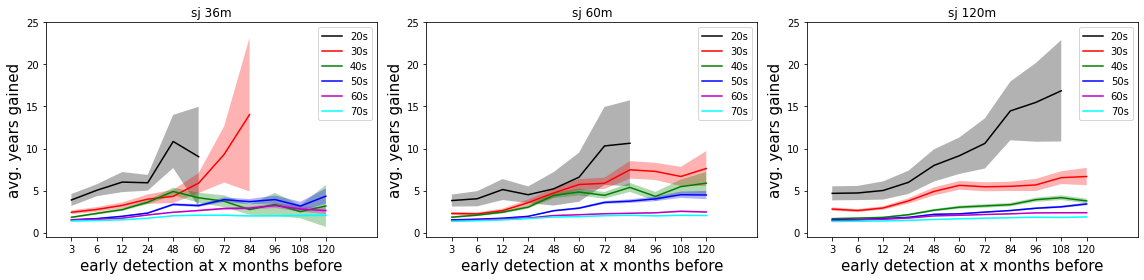

In [52]:
plot_yg3([dat20, dat30, dat40, dat50, dat60, dat70])

In [53]:
# color = ['darkblue', 'blue', 'royalblue', 'cornflowerblue', 'slategray', 'lightsteelblue']
color = ['k', 'r', 'g', 'b', 'm', 'cyan']

def plot_yg_ind(datf, s, a):
    legend = ['sj 36m', 'sj 60m', 'sj 120m']
    # fig = plt.figure(figsize = (6,4))
    sj_test = [36, 60, 120]
    ii=0
    col=0
    for d in tqdm(sj_test):
        # plt.subplot(1, 3, ii+1)
        dat = datf[d]
        avg, ci = [], []
        for m in test_months:
            if len(dat[m])>0:
                y = dat[m]['years_gained']
                avg_value = np.mean(y)
                ci_up_down = st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y), scale=st.sem(y))
                ci_up = ci_up_down[1]-avg_value
                ci_down = avg_value - ci_up_down[0]
                ci.append([ci_down, ci_up])
                avg.append(avg_value)
        y_errormin = [i[0] for i in ci]
        y_errormax = [i[1] for i in ci]
        y_error =[y_errormin, y_errormax]
        plt.plot(np.array(range(len(avg)))+1, avg, color = color[col])
        plt.fill_between(np.array(range(len(avg)))+1, np.array(avg)-np.array(y_errormin), np.array(avg)+np.array(y_errormax), alpha=0.3, facecolor = color[col])
        col += 1

        plt.xticks(np.array(range(len(test_months)))+1, test_months)
        plt.ylabel('avg. years gained', fontsize = 15)
        plt.xlabel('early detection at x months before', fontsize = 15)
        plt.legend(legend, fontsize = 12)
        plt.title('patient diagnosed stage '+ s + ' at age '+ str(a), fontsize = 15)
        
        # plt.ylim([0, 8])
        # plt.xlim([0, 13])
        ii += 1
    plt.tight_layout()

In [56]:
def cfQ(res, detected_age, detected_stage):
    database = {}
    for m in test_months:
        chart = res_df(res, m)
        
        selected_chart = []
        for i, row in chart.iterrows():
            if np.floor(row['detectedAt']) == detected_age:
                if row['detected_stage']==detected_stage:
                    selected_chart.append(row)
        database[m] = pd.DataFrame(selected_chart)
    return database

In [57]:
dat54_DT4 = {}
dat54_DT3 = {}
dat54_DT2 = {}
dat54_DT1 = {}

dat67_DT4 = {}
dat67_DT3 = {}
dat67_DT2 = {}
dat67_DT1 = {}

sj_test = [36, 60, 120]
ii=0
for d in tqdm([res36, res60, res120]):
    dat54_DT4[sj_test[ii]] = cfQ(d, 54, 'DT4')
    dat54_DT3[sj_test[ii]] = cfQ(d, 54, 'DT3')
    dat54_DT2[sj_test[ii]] = cfQ(d, 54, 'DT2')
    dat54_DT1[sj_test[ii]] = cfQ(d, 54, 'DT1')
    
    dat67_DT4[sj_test[ii]] = cfQ(d, 67, 'DT4')
    dat67_DT3[sj_test[ii]] = cfQ(d, 67, 'DT3')
    dat67_DT2[sj_test[ii]] = cfQ(d, 67, 'DT2')
    dat67_DT1[sj_test[ii]] = cfQ(d, 67, 'DT1')

    ii += 1

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [42:18<00:00, 846.01s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 56.85it/s]


(0.5, 7.8)

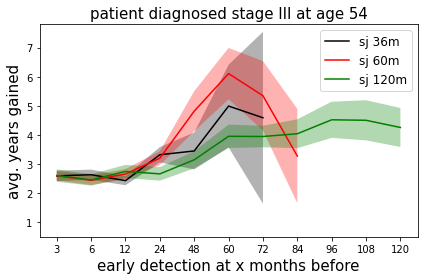

In [68]:
plot_yg_ind(dat54_DT3, 'III', 54)
plt.ylim([0.5,7.8])

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 56.85it/s]


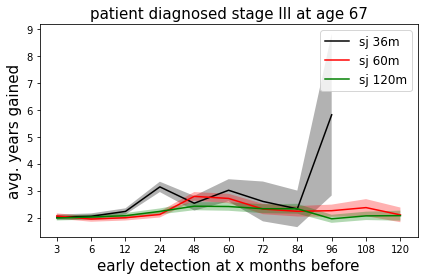

In [62]:
plot_yg_ind(dat67_DT3, 'III', 67)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 53.81it/s]


(0.5, 7.8)

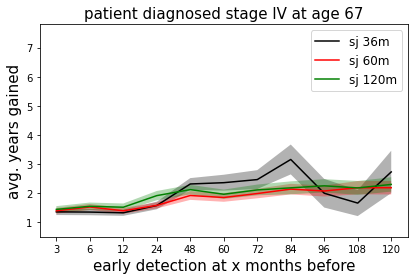

In [69]:
plot_yg_ind(dat67_DT4, 'IV', 67)
plt.ylim([0.5,7.8])

In [70]:
s36, s60, s120 = {}, {}, {}
for m in tqdm(test_months):
    s36[m] = res_df(res36, m)
    s60[m] = res_df(res60, m)
    s120[m] = res_df(res120, m)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [04:12<00:00, 22.96s/it]


In [71]:
def draw_hist(df, col, color):
    plt.hist(df[col], bins=20, alpha = 0.3, density = True, color = color)
    pd.Series(df[col]).plot(kind = 'kde', color = color)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:50<00:00,  4.55s/it]


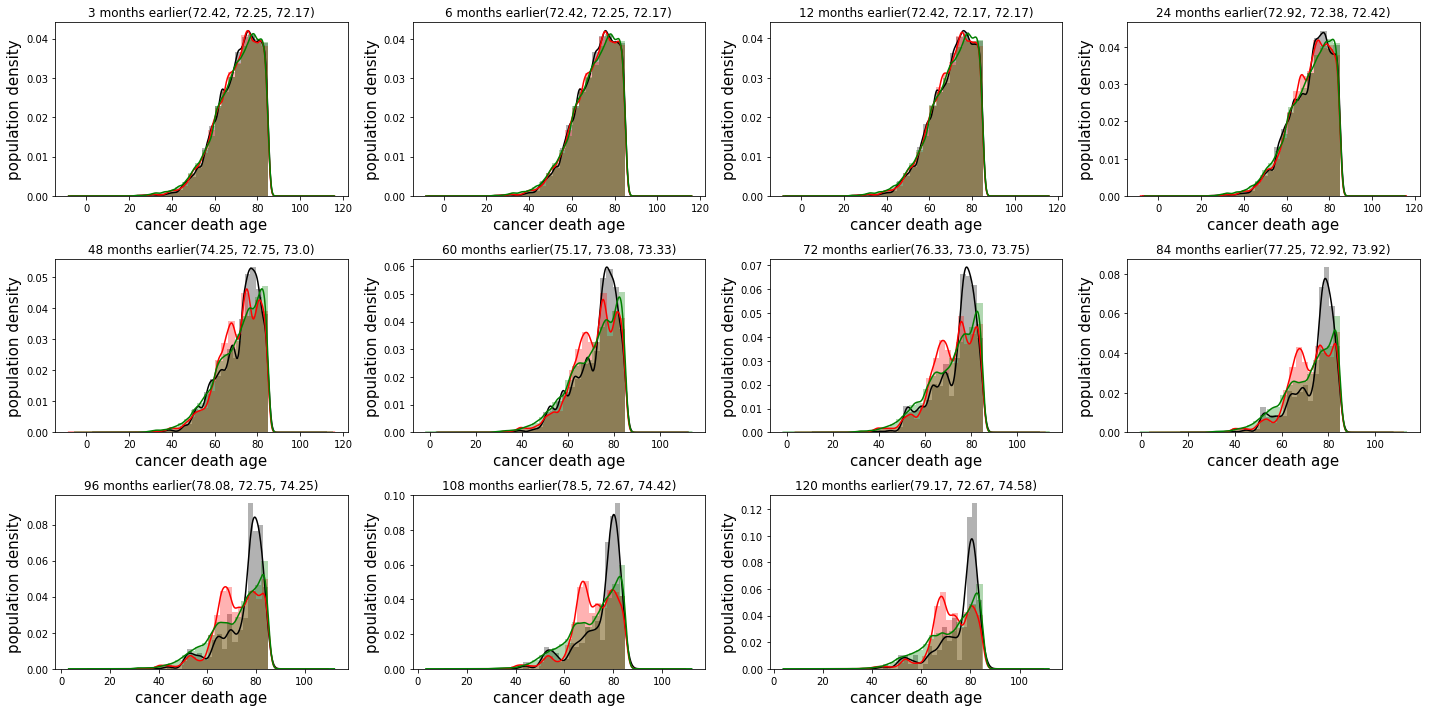

In [72]:
var = 'pcmortAt'
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in tqdm(range(len(test_months))):
    plt.subplot(3, 4, i+1)
    
    draw_hist(s36[test_months[i]], var, 'k')
    draw_hist(s60[test_months[i]], var, 'r')
    draw_hist(s120[test_months[i]], var, 'g')
    
    m36 = round(np.median(s36[test_months[i]][var])*100)/100
    m60 = round(np.median(s60[test_months[i]][var])*100)/100
    m120 = round(np.median(s120[test_months[i]][var])*100)/100
    
    plt.title(str(test_months[i])+' months earlier'+'('+str(m36)+', '+str(m60)+', '+str(m120)+ ')')
    
    plt.xlabel('cancer death age', fontsize = 15)
    plt.ylabel('population density', fontsize = 15)
    # plt.legend(['sj 36m', 'sj 60m', 'sj 120m'], fontsize = 12)
    
plt.tight_layout()